<div class="alert alert-block alert-info">
<img src="./Imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO">
<br><font face = "Times New Roman" size = "6"><b><center>Maestría en Sistemas Computacionales</center></b></font>
<br><font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>

<b><br><font face = "Times New Roman" size = "4"><center>Unidad 2: Conceptos Generales</center></font>
<font face = "Times New Roman" size = "4"><center>Tema 2.6: Conceptos del Procesamiento de Imágenes</center></font>
<font face = "Times New Roman" size = "4"><center>Subtema d: Procesamiento de Imágenes</center></font></b>
</div>

## PROCESAMIENTO DE IMÁGENES

En este subtema se describen algunos principios básicos del **Procesamiento de Imágenes** empleando **OpenCV**.

Para ello, se realizará la carga de la imagen con los siguientes pasos:

1. Se cargan las librerías `OpenCV`, `NumPy` y `Matplotlib`.
2. Se lee el archivo `Lily.jpg`.
3. Se convierte del modo `BGR` a `RGB`.
4. Se imprime la imagen para verificación.

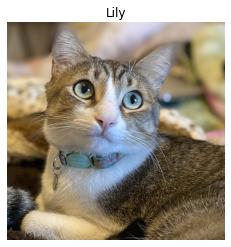

In [1]:
#Importación de Librerías
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

#Lectura de la Imagen desde un archivo JPG
Imagen = cv2.imread("./Imagenes/Lily.jpg")    

#Modificación del Espacio de Color
Lily = cv2.cvtColor(Imagen, cv2.COLOR_BGR2RGB)

#Impresión de la Imagen
plt.imshow(Lily)
plt.axis('off')
plt.title("Lily")
plt.show()

### Manipulaciones Básicas
Algunas de las manipulaciones básicas de imágenes empleando **OpenCV** se describen a continuación.

#### Reflejo:
La operación de **Reflejo** (*flip*) se lleva a cabo empleando el método `.flip(a,b)`, donde los argumentos son definidos por:

* El argumento `a`: Indica el nombre de la variable que contiene a la imagen.
* El argumento `b`: Puede ser `0` para giro vertical, o `1` para giro horizontal.

Esto es:

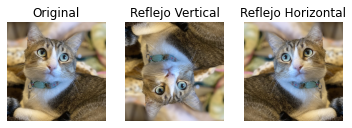

In [2]:
#Operaciones de Giro
Lily_flip0 = cv2.flip(Lily,0)
Lily_flip1 = cv2.flip(Lily,1)

#Impresión de las Imágenes 
plt.subplot(1,3,1), plt.imshow(Lily), plt.axis('off'), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(Lily_flip0), plt.axis('off'), plt.title("Reflejo Vertical")
plt.subplot(1,3,3), plt.imshow(Lily_flip1), plt.axis('off'), plt.title("Reflejo Horizontal")
#plt.imsave('./Imagenes/Lily_GV.jpg', Lily_flip0)
#plt.imsave('./Imagenes/Lily_GH.jpg', Lily_flip1)
plt.show()

#### Transpuesta:
La operación de imagen **Transpuesta** (*transpose*) se realiza por medio del método `.transpose()` de la manera descrita a continuación. 

***Nota:*** Es importante notar que la operación de imagen **Transpuesta** convierte cada renglón en columnas, es por ello que se hace una rotación de 90 grados contra las manecillas del reloj, pero a la vez se hace una operación de **Reflejo**.

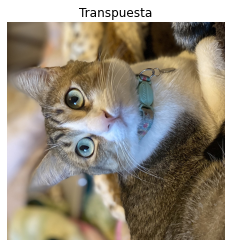

In [3]:
#Operacion de Transpuesta
Lily_trans = cv2.transpose(Lily)

#Impresión de la Imagen
plt.imshow(Lily_trans)
plt.axis('off')
plt.title("Transpuesta")
#plt.imsave('./Imagenes/Lily_TR.jpg', Lily_trans)
plt.show()

#### Rotación:
Una manera de realizar la operación de **Rotación** de una imagen, incluso especificando la cantidad de grados a rotar (en sentido contrario de las manecillas del reloj), es por medio del uso de una función de nombre `RotarImagen(imagen,angulo,p_base)`, cuyos argumentos son:

* El argumento `imagen`: Indica el nombre de la variable que contiene a la imagen.
* El argumento `angulo`: Indica el valor del ángulo a rotar.
* El argumento `p_base`: Indica el Punto Base a partir del cual se hará la rotación.

Para ello, la función `RotarImagen(imagen,angulo,p_base)` realiza las siguientes operaciones:

1. Determina una matriz de rotación mapeando por medio del método `.getRotationMatrix2D()`.
2. Mapea la matriz de rotación con la imagen de entrada usando el método `.warpAffine()`.

Debido a que se hará la rotación en base al centro de la imagen, se define una **Tupla** la cual será un arreglo de **NumPy** que contiene 2 elementos: el punto medio del renglón y el punto medio de la columna. Es necesario que sea una **Tupla** ya que el método `.getRotationMatrix2D()` lo requiere de esa manera (es decir, no puede ser una **Lista**).

Esto es:

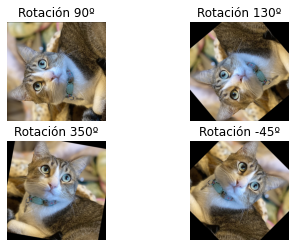

In [4]:
#Función para la Rotación
def RotarImagen(imagen, angulo, p_base):
    mat_rot = cv2.getRotationMatrix2D(p_base,angulo,1.0)
    return cv2.warpAffine(imagen, mat_rot, imagen.shape[0:2], flags = cv2.INTER_LINEAR)

#Definición de Tupla con el Centro de la Imagen como Punto Base
centro = tuple(np.array(Lily.shape[0:2])/2)

#Operacion de Rotación
Lily_r90  = RotarImagen(Lily,90,  centro)
Lily_r130 = RotarImagen(Lily,130, centro)
Lily_r350 = RotarImagen(Lily,350, centro)
Lily_rn45 = RotarImagen(Lily,-45, centro)

#Impresión de las Imágenes 
plt.subplot(2,2,1), plt.imshow(Lily_r90),  plt.axis('off'), plt.title("Rotación 90º")
plt.subplot(2,2,2), plt.imshow(Lily_r130), plt.axis('off'), plt.title("Rotación 130º")
plt.subplot(2,2,3), plt.imshow(Lily_r350), plt.axis('off'), plt.title("Rotación 350º")
plt.subplot(2,2,4), plt.imshow(Lily_rn45), plt.axis('off'), plt.title("Rotación -45º")
#plt.imsave('./Imagenes/Lily_r90.jpg',  Lily_r90)
#plt.imsave('./Imagenes/Lily_r130.jpg', Lily_r130)
#plt.imsave('./Imagenes/Lily_r350.jpg', Lily_r350)
#plt.imsave('./Imagenes/Lily_rn45.jpg', Lily_rn45)
plt.show()

#### Rotación en base a un Punto de Referencia:
Sin embargo, es posible definir una **Tupla** con un punto específico a través del cual se hará la **Rotación** de la imagen. Por ejemplo, para rotar 120 grados con base en la coordenada *(400,250)*, se define el punto base y posteriormente se llama a la función `RotarImagen(imagen,angulo,p_base)` de esta manera:

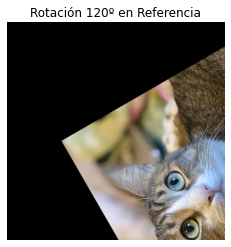

In [5]:
#Definición de Tupla con el Punto Base de Rotación
p_base = (400,250)

#Operacion de Rotación
Lily_r120 = RotarImagen(Lily,120,p_base)

#Impresión de las Imágenes 
plt.imshow(Lily_r120)  
plt.axis('off') 
plt.title("Rotación 120º en Referencia")
#plt.imsave('./Imagenes/Lily_r120.jpg', Lily_r120)
plt.show()

#### Reescalamiento:
Finalmente, la operación de **Reescalamiento** de una imagen se puede realizar por medio del uso de una función de nombre `Reescalar(imagen, escala)`, cuyos argumentos son:

* El argumento `imagen`: Indica el nombre de la variable que contiene a la imagen.
* El argumento `escala`: Indica el valor del porcentaje de reescalamiento a apicar.

Para ello, la función `Reescalar(imagen, escala)` realiza las siguientes operaciones:

1. Modifica el ancho de la imagen multiplicándolo por la escala.
2. Modifica el alto de la imagen multiplicándolo por la escala.
3. Genera una **Tupla** con los dos valores previos.
4. Aplica el método `.resize()` para reescalar la imagen usando el valor de la **Tupla**.

**Nota:** Debido a las restricciones de **Jupyter Notebook**, no es posible visualizar la modificación de la escala de cada imagen en este **Notebook**. Sin embargo, las funciones para guardar cada imagen se pueden descomentar para poder compararlas. Adicional a ello, se muestran las dimensiones finales después de la operación de **Reescalamiento**.

Esto es:

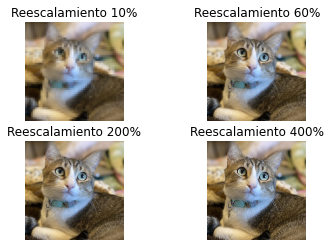

El tamaño de la Imagen Original es: (512, 512, 3)
El tamaño de la Imagen Reescalada al 10% es: (51, 51, 3)
El tamaño de la Imagen Reescalada al 60% es: (307, 307, 3)
El tamaño de la Imagen Reescalada al 200% es: (1024, 1024, 3)
El tamaño de la Imagen Reescalada al 400% es: (2048, 2048, 3)


In [6]:
#Función para Reescalamiento
def Reescalar(imagen, escala):
    ancho = int(imagen.shape[1] * escala / 100)
    alto = int(imagen.shape[0] * escala / 100)
    dim = (ancho, alto)
    return cv2.resize(imagen, dim, interpolation = cv2.INTER_AREA)
    
#Operacion de Reescalamiento
Lily_R10p  = Reescalar(Lily,10)
Lily_R60p  = Reescalar(Lily,60)
Lily_R200p = Reescalar(Lily,200)
Lily_R400p = Reescalar(Lily,400)

#Impresión de las Imágenes 
plt.subplot(2,2,1), plt.imshow(Lily_R10p),  plt.axis('off'), plt.title("Reescalamiento 10%")
plt.subplot(2,2,2), plt.imshow(Lily_R60p),  plt.axis('off'), plt.title("Reescalamiento 60%")
plt.subplot(2,2,3), plt.imshow(Lily_R200p), plt.axis('off'), plt.title("Reescalamiento 200%")
plt.subplot(2,2,4), plt.imshow(Lily_R400p), plt.axis('off'), plt.title("Reescalamiento 400%")
#plt.imsave('./Imagenes/Lily_R10p.jpg',  Lily_R10p)
#plt.imsave('./Imagenes/Lily_R60p.jpg', Lily_R60p)
#plt.imsave('./Imagenes/Lily_R200p.jpg', Lily_R200p)
#plt.imsave('./Imagenes/Lily_R400p.jpg', Lily_R400p)
plt.show()

#Impresión de los Valores
print("El tamaño de la Imagen Original es:", Lily.shape)
print("El tamaño de la Imagen Reescalada al 10% es:",  Lily_R10p.shape)
print("El tamaño de la Imagen Reescalada al 60% es:",  Lily_R60p.shape)
print("El tamaño de la Imagen Reescalada al 200% es:", Lily_R200p.shape)
print("El tamaño de la Imagen Reescalada al 400% es:", Lily_R400p.shape)

### Modificaciones a las Imágenes
Algunas de las modificaciones que se pueden realizar a las imágenes empleando **OpenCV** se describen a continuación.

#### Operación de Umbralización (Threshold)
La **Umbralización (Threshold)** es el método más simple para realizar una segmentación en una imagen. Se realiza por medio de la separación de regiones de una imagen correspondientes a los objetos que se quieren analizar. Esta separación se basa en la variación de la intensidad entre los pixeles de objetos y los pixeles del fondo.

Para diferenciar los pixeles de interés del resto (que eventualmente serán rechazados), se realiza una comparación de cada valor de intensidad de los pixeles con respecto a un **umbral** que es determinado según el problema a resolver.

Una vez separados correctamente los pixeles importantes, se pueden establecer con un valor determinado para identificarlos, por ejemplo, colores `negro` o `blanco` para diferenciarlos.

En **OpenCV** esta operación se realiza por medio del método `.threshold(a,b,c,d)`, cuyos argumentos son:

* El argumento `a`: Indica el nombre de la variable que contiene a la imagen.
* El argumento `b`: Indica el valor de **umbral** que será la referencia.
* El argumento `c`: Indica el valor máximo a analizar.
* El argumento `d`: Indica el tipo de **umbral** a emplear.

La documentación detallada del método `.threshold()` se puede consultar [en esta liga](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57).

Para este ejemplo, emplearemos la imagen de `Lily` en escala de grises para que sea más correcta la determinación de la operación de **Umbralización**, esto es:

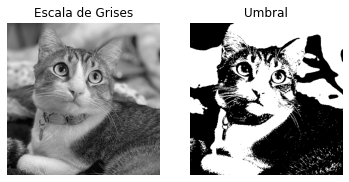

In [7]:
#Imagen en Escala de Grises
Lily_GS = cv2.cvtColor(Lily, cv2.COLOR_RGB2GRAY)

#Valor del Umbral
umbral = 127

#Operacion de Umbralización (Threshold)
ret, Lily_TH = cv2.threshold(Lily_GS, umbral, 255, 0)

#Impresión de las Imágenes 
plt.subplot(1,2,1), plt.imshow(Lily_GS, cmap='gray'), plt.axis('off'), plt.title("Escala de Grises")
plt.subplot(1,2,2), plt.imshow(Lily_TH, cmap='gray'), plt.axis('off'), plt.title("Umbral")
#plt.imsave('./Imagenes/Lily_TH.jpg', Lily_TH, cmap='gray')
plt.show()

#### Operación de Reducción de Ruido
La operación de **Reducción de Ruido** generalmente emplea la operación de **Difuminado/Suavizado (Blurring/Smoothing)** en una imagen empleando un modelo ***Gaussiano***.

El ancho del modelo ***Gaussiano*** determinará la cantidad de **Suavizado** a aplicar.

En **OpenCV** esta operación se realiza por medio del método `.GaussianBlur(a,b,c)`, cuyos argumentos son:

* El argumento `a`: Indica el nombre de la variable que contiene a la imagen.
* El argumento `b`: Indica el ancho y el alto del modelo ***Gaussiano*** a aplicar.
* El argumento `c`: Indica el valor de la desviación estándar a aplicar.

La documentación detallada del método `.GaussianBlur()` se puede consultar [en esta liga](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#gaussianblur).

Para este ejemplo, emplearemos la imagen de `Lily` aplicando un valor `d` que marca el ancho del modelo ***Gaussiano*** a aplicar.

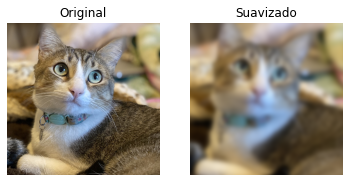

In [8]:
#Valor del ancho del modelo Gaussiano
d = 20

#Operacion de Suavizado (Blur)
Lily_BL = cv2.GaussianBlur(Lily, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

#Impresión de las Imágenes 
plt.subplot(1,2,1), plt.imshow(Lily), plt.axis('off'), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(Lily_BL), plt.axis('off'), plt.title("Suavizado")
#plt.imsave('./Imagenes/Lily_BL.jpg', Lily_BL)
plt.show()

### Detección de Bordes
La **Detección de Bordes** se había revisado en sesiones anteriores por medio de la operación de **Convolución** con una matriz previamente definida. Adicionalmente, las **Redes Neuronales Convolucionales (Convolutional Neural Networks)** son una técnica que ofrece resultados a estos procesos, pero es un tópico que no se abordará en este curso. Se analizarán dos métodos que realizan la operación de **Detección de Bordes**.

#### Detección de Bordes de Sobel
El método de **Detección de Bordes de Sobel** fue uno de los primeros que pudieron realizar la operación de manera adecuada, invoucrando la operación de **Convolución** dentro de su proceso. 

En **OpenCV** esta operación se realiza por medio del método `.Sobel(a,b,c,d,e)`, cuyos argumentos son:

* El argumento `a`: Indica el nombre de la variable que contiene a la imagen.
* El argumento `b`: Indica la función Gradiente a emplear (se emplea `cv2.CV_64F` en este caso).
* El argumento `c`: Indica la aplicación en el eje `X` (1 aplica, 0 no aplica).
* El argumento `d`: Indica la aplicación en el eje `Y` (1 aplica, 0 no aplica).
* El argumento `e`: Indica el tamaño del núcleo de Sobel.

La documentación detallada del método `.Sobel()` se puede consultar [en esta liga](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d).

Para este ejemplo, emplearemos la imagen de `Lily` en escala de grises para que sea más correcta la determinación de la operación de **Detección de Bordes de Sobel**. Por otro lado, se puede aplicar al eje `X`, al eje `Y` o a ambos, esto es:

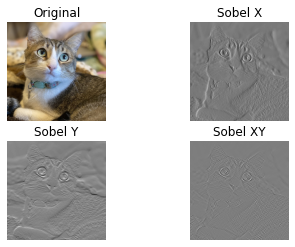

In [9]:
#Imagen en Escala de Grises
Lily_GS = cv2.cvtColor(Lily, cv2.COLOR_RGB2GRAY)

#Operacion de Detección de Borde de Sobel
Lily_Sx  = cv2.Sobel(Lily_GS,cv2.CV_64F,1,0,ksize=9)
Lily_Sy  = cv2.Sobel(Lily_GS,cv2.CV_64F,0,1,ksize=9)
Lily_Sxy = cv2.Sobel(Lily_GS,cv2.CV_64F,1,1,ksize=9)

#Impresión de las Imágenes 
plt.subplot(2,2,1), plt.imshow(Lily), plt.axis('off'), plt.title("Original")
plt.subplot(2,2,2), plt.imshow(Lily_Sx, cmap = 'gray'), plt.axis('off'), plt.title("Sobel X")
plt.subplot(2,2,3), plt.imshow(Lily_Sy, cmap = 'gray'), plt.axis('off'), plt.title("Sobel Y")
plt.subplot(2,2,4), plt.imshow(Lily_Sxy,cmap = 'gray'), plt.axis('off'), plt.title("Sobel XY")
#plt.imsave('./Imagenes/Lily_Sx.jpg', Lily_Sx, cmap = 'gray')
#plt.imsave('./Imagenes/Lily_Sy.jpg', Lily_Sy, cmap = 'gray')
#plt.imsave('./Imagenes/Lily_Sxy.jpg', Lily_Sxy, cmap = 'gray')
plt.show()

#### Detección de Bordes de Canny
El método de **Detección de Bordes de Canny** emplea dos **umbrales** en su aplicación:

* El primer **umbral** determina la posibilidad de que **Canny** encuentre un borde.
* El segundo **umbral** determina la posibilidad de que **Canny** siga ese borde una vez encontrado.

En **OpenCV** esta operación se realiza por medio del método `.Canny(a,b,c)`, cuyos argumentos son:

* El argumento `a`: Indica el nombre de la variable que contiene a la imagen.
* El argumento `b`: Indica el valor del primer **umbral**.
* El argumento `c`: Indica el valor del segundo **umbral**.

La documentación detallada del método `.cv2.Canny()` se puede consultar [en esta liga](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=canny).

Para este ejemplo, emplearemos una versión **Suavizada** de la imagen de `Lily` y en escala de grises para que sea más correcta la determinación de la operación de **Detección de Bordes de Canny**. Por otro lado, se recomienda que el segundo **umbral** sea de 2 a 3 veces el valor del primer **umbral**, esto es:

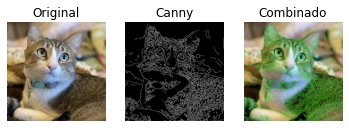

In [10]:
#Valores de Umbrales y Suavizado
umbral1 = 30
umbral2 = 60 
d = 3

#Suavizado y Escala de Grises de la Imagen
Lily_Ca = Lily.copy()
Lily_Ca = cv2.GaussianBlur(Lily_Ca, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
Lily_Ca_GR = cv2.cvtColor(Lily_Ca, cv2.COLOR_RGB2GRAY)

#Operacion de Detección de Borde de Canny
Borde = cv2.Canny(Lily_Ca_GR, umbral1, umbral2)

#Combinando los Bordes con la Imagen Original
Lily_Ca[Borde != 0] = (0, 255, 0)

#Impresión de las Imágenes 
plt.subplot(1,3,1), plt.imshow(Lily), plt.axis('off'), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(Borde, cmap = 'gray'), plt.axis('off'), plt.title("Canny")
plt.subplot(1,3,3), plt.imshow(Lily_Ca), plt.axis('off'), plt.title("Combinado")
#plt.imsave('./Imagenes/Lily_Ca.jpg', Lily_Ca)
plt.show()

<div class="alert alert-block alert-success">
<b>.: Fin del Subtema :.</b>
</div>

***Liga de aceso al siguiente Subtema:*** 
<br>[e. Clasificación en Cascada](e.%20Clasificacion%20en%20Cascada.ipynb)